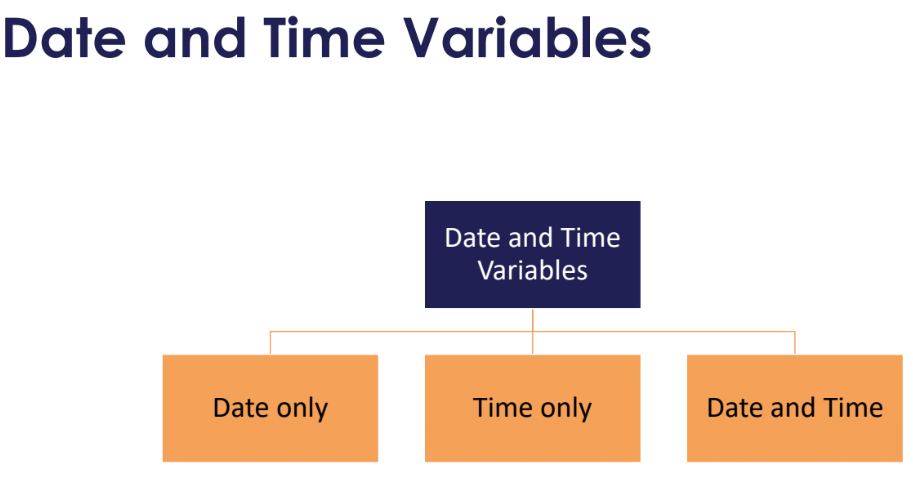

# **Date time features note**

**Additional references**
* [Date time](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AIVN7tjTfcRKUZpkWW0PncM/Section-15-EngineeringDatetime?e=2&preview=01-datetime-features-intro.pdf&rlkey=7257ih8lct4v0nkroy7if74i1&dl=0)

# Date and Time features with Feature-engine


## Extract all possible features

* DatetimeFeatures can also extract the most common features out-of-the-box
* if features_to_extract = None.



In [ ]:
from feature_engine.datetime import DatetimeFeatures

# Step 1: Set up the DatetimeFeatures transformer
# Initialize the transformer to extract datetime features from all detected datetime variables
dtfs = DatetimeFeatures(
    variables=None,  # Automatically identifies datetime variables
    features_to_extract="all",  # Extract all available features from the datetime variable
)

# Step 2: Extract datetime features from the dataset
# Fit the transformer and create new datetime-related features
dft = dtfs.fit_transform(data)  # Apply the transformation to extract datetime features

# Step 3: Capture the names of the newly created datetime features
# Filter the new features by checking if 'InvoiceDate' is in their name
vars_ = [v for v in dft.columns if "InvoiceDate" in v]  # Extract names of newly created features

# Step 4: Display the first few rows of the extracted features
# Show the new features created from the 'InvoiceDate' variable
dft[vars_].head()  # Display the extracted datetime features

# Step 5: Access the automatically identified datetime variable(s)
# The automatically identified datetime variable is stored in the 'variables_' attribute
dtfs.variables_  # View the datetime variable that was detected and used for feature extraction

## Extract user defined features


In [ ]:
from feature_engine.datetime import DatetimeFeatures

# Step 1: Set up the DatetimeFeatures transformer
# Initialize the transformer to extract specific datetime features from all detected datetime variables
dtfs = DatetimeFeatures(
    variables=None,  # Automatically identifies datetime variables
    features_to_extract=["week", "year", "day_of_month", "day_of_week"],  # Extract specific datetime features
)

# Step 2: Extract datetime features from the dataset
# Fit the transformer and create the specified datetime-related features
dft = dtfs.fit_transform(data)  # Apply the transformation to extract the selected datetime features

# Step 3: Capture the names of the newly created datetime features
# Filter the new features by checking if 'InvoiceDate' is in their name
vars_ = [v for v in dft.columns if "InvoiceDate" in v]  # Extract names of newly created features

# Step 4: Display the first few rows of the extracted features
# Show the new features created from the 'InvoiceDate' variable
dft[vars_].head()  # Display the extracted datetime features

# Working with timezones

* DatetimeFeatures also takes care of different time zones out-of-the-box.
* If you work with timezones on a dataframe, refer to this link for additional reference.

**Additional references**
* [Time-zones](https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-15-Date-Time-Features/02-feature-engine/01-datetime-with-Feature-engine.ipynb)

In [ ]:
from feature_engine.datetime import DatetimeFeatures

# Step 1: Instantiate the DatetimeFeatures transformer
# DatetimeFeatures will extract 'day_of_week', 'hour', and 'minute' from the datetime columns, and keep the original column
dfts = DatetimeFeatures(
    features_to_extract=["day_of_week", "hour", "minute"],  # Specify the features to extract
    drop_original=False,  # Keep the original datetime columns in the data
    utc=True,  # Convert timestamps to UTC to handle timezones
)

# Step 2: Fit and transform the data
# DatetimeFeatures will take all timestamps to UTC before deriving the features.
dft = dfts.fit_transform(df)  # Fit to the data and create new datetime features

# Step 3: View the transformed data
# Shows the new dataframe with extracted datetime features.
dft.head()  # Display the first few rows of the transformed dataset

# Periodic features

Periodic features are those that repeat their values at regular intervals, like the hour, the days of a week, and the months of a year.

With cyclical or periodic features, values that are very different in absolute magnitude are actually close. For example, January is close to December, even though their absolute magnitude suggests otherwise.

We can use periodic functions like sine and cosine, to transform cyclical features and help machine learning models pick up their intrinsic nature.

## Cyclical encoding

**Impact on ML Models**

Sine and cosine transformations make periodic patterns easier for machine learning models to capture because they encode the continuity of the cycle. In a regression model, it would reduce the chance of incorrect predictions near cycle boundaries. In tree-based models, it helps avoid over-splitting on the cyclic feature since the values maintain continuity.

**Combining Sine and Cosine**

The combination of sine and cosine forms a two-dimensional circular representation of a cyclical feature. This ensures that the machine learning model can use both dimensions to learn relationships across the periodicity.

**Benefits of Using Sine and Cosine Transformations**

Captures Cyclic Nature: These transformations capture the cyclic property of time-based or periodic features, ensuring that the values at the beginning and end of the cycle are close to each other.
Improves Model Performance: In models like linear regression, decision trees, or neural networks, cyclic features can be treated appropriately, leading to better learning of time-based patterns.
Removes Discontinuity: Avoids the problem of artificial discontinuity that arises when using raw numerical representations. For example, hour 23 is closer to 0 than to 12, which the sine and cosine transformations capture.

In [ ]:
#Step 1: Import necessary modules
# Import modules to create cyclical and datetime features
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures

#Step 2: Import pipeline functionality
# Import the pipeline from scikit-learn to automate transformations
from sklearn.pipeline import Pipeline

#Step 3: Initialize the pipeline
# Start the pipeline with a list of transformations to be applied
pipe = Pipeline([

    #Step 4: Extract datetime features
    # Extract month and hour from the "Date_Time" variable and drop the original
    ('datetime', DatetimeFeatures(
        variables="Date_Time",
        features_to_extract=["month", "hour"],
        drop_original=True,
    )),

    #Step 5: Apply cyclical transformation
    # Use sine and cosine transformations on the extracted month and hour features
    ('cyclical', CyclicalFeatures(
        variables=["Date_Time_month", "Date_Time_hour"],
    )),
])

#Step 6: Transform the data
# Apply the pipeline to the dataset to extract and transform the features
data = pipe.fit_transform(data)

#Step 7: Display transformed data
# Show the first few rows of the transformed dataset
data.head()

# Mixed variables

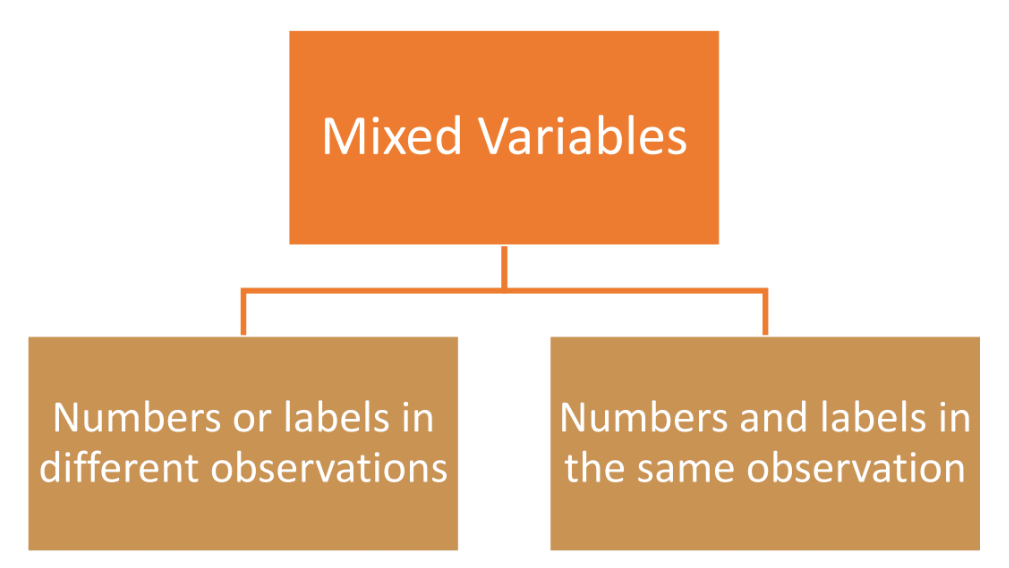

## Engineering mixed variables

We've seen that mixed variables are those which values contain both numbers and labels. A mixed variable can contain numbers OR labels in different observations, or numbers AND labels in each observation.

For example, the variable vehicle registration is an example of letters and numbers combined in each observation (e.g., NK11DGX), whereas the variable number of missed payments as we covered in section 2, is an example of numbers or labels, where the values can be 0, 1, 2 or 3, or A and D.

**How can we engineer mixed variables?**

We can sometimes derive meaningful features by extracting the categorical part in one variable and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one. Then we proceed with the derived variables as we would do with any categorical or numerical variable.

**Additional references**

* [Mixed Variables](https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-16-Mixed-Variables/01-mixed-variables.ipynb)